##Definition of quantiles

1. Definition of quantiles
- Quantiles are cutoff points that divide a dataset into intervals with set probabilities. The  q th quantile is the value at which  q % of the observations are equal to or less than that value.

2. Using the quantile function
- Given a dataset data and desired quantile q, you can find the qth quantile of data with:

      quantile(data,q)
3. Percentiles
- Percentiles are the quantiles that divide a dataset into 100 intervals each with 1% probability. You can determine all percentiles of a dataset data like this:
      p <- seq(0.01, 0.99, 0.01)
      quantile(data, p)
4. Quartiles
- Quartiles divide a dataset into 4 parts each with 25% probability. They are equal to the 25th, 50th and 75th percentiles. The 25th percentile is also known as the 1st quartile, the 50th percentile is also known as the median, and the 75th percentile is also known as the 3rd quartile.
-The summary() function returns the minimum, quartiles and maximum of a vector.

In [21]:
install.packages("dslabs")
#Load the heights dataset from the dslabs package:
library(dslabs)
data(heights)
#Use summary() on the heights$height variable to find the quartiles:
summary(heights$height)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.00   66.00   68.50   68.32   71.00   82.68 

In [24]:
#Find the percentiles of heights$height:
p <- seq(0.01, 0.99, 0.01)
percentiles <- quantile(heights$height, p)
percentiles

1%       2%       3%       4%       5%       6%       7%       8% 
59.00000 60.00000 60.00000 61.00000 62.00000 62.00000 62.28869 63.00000 
      9%      10%      11%      12%      13%      14%      15%      16% 
63.00000 63.00000 63.77953 64.00000 64.00000 64.00000 64.17321 64.96000 
     17%      18%      19%      20%      21%      22%      23%      24% 
65.00000 65.00000 65.00000 65.00000 65.00000 65.94457 66.00000 66.00000 
     25%      26%      27%      28%      29%      30%      31%      32% 
66.00000 66.00000 66.00000 66.00000 66.50000 66.92000 66.92913 67.00000 
     33%      34%      35%      36%      37%      38%      39%      40% 
67.00000 67.00000 67.00000 67.00000 67.00000 67.00000 67.32200 67.71650 
     41%      42%      43%      44%      45%      46%      47%      48% 
67.72540 68.00000 68.00000 68.00000 68.00000 68.00000 68.00000 68.00000 
     49%      50%      51%      52%      53%      54%      55%      56% 
68.11024 68.50000 68.89000 68.89764 69.00000 69.00000 69.00000 69.00000 
     57%      58%      59%      60%      61%      62%      63%      64% 
69.00000 69.00000 69.00000 69.00000 69.60000 70.00000 70.00000 70.00000 
     65%      66%      67%      68%      69%      70%      71%      72% 
70.00000 70.00000 70.00000 70.00000 70.00000 70.07874 70.73700 70.86614 
     73%      74%      75%      76%      77%      78%      79%      80% 
71.00000 71.00000 71.00000 71.00000 71.00000 71.11000 72.00000 72.00000 
     81%      82%      83%      84%      85%      86%      87%      88% 
72.00000 72.00000 72.00000 72.00000 72.00000 72.00000 72.00000 72.44011 
     89%      90%      91%      92%      93%      94%      95%      96% 
72.83465 73.00000 73.00000 74.00000 74.00000 74.00000 74.80315 75.00000 
     97%      98%      99% 
75.00000 76.00000 78.00000

In [23]:
#Confirm that the 25th and 75th percentiles match the 1st and 3rd quartiles. Note that quantile() returns a named vector. 
#You can access the 25th and 75th percentiles like this (adapt the code for other percentile values):
percentiles[names(percentiles) == "25%"]
percentiles[names(percentiles) == "75%"]

25% 
 66

75% 
 71

##Finding quantiles with qnorm
1. Definition of qnorm
- The qnorm() function gives the theoretical value of a quantile with probability p of observing a value equal to or less than that quantile value given a normal distribution with mean mu and standard deviation sigma:

      qnorm(p, mu, sigma)
- By default, mu=0 and sigma=1. Therefore, calling qnorm() with no arguments gives quantiles for the standard normal distribution.

      qnorm(p)
- Recall that quantiles are defined such that p is the probability of a random observation less than or equal to the quantile.

2. Relation to pnorm
- The pnorm() function gives the probability that a value from a standard normal distribution will be less than or equal to a z-score value z. Consider:

      pnorm(-1.96)  ≈0.025 
- The result of pnorm() is the quantile. Note that:

      qnorm(0.025)  ≈−1.96 
- qnorm() and pnorm() are inverse functions:

      pnorm(qnorm(0.025))  =0.025 
3. Theoretical quantiles
- You can use qnorm() to determine the theoretical quantiles of a dataset: that is, the theoretical value of quantiles assuming that a dataset follows a normal distribution. Run the qnorm() function with the desired probabilities p, mean mu and standard deviation sigma. 

- Suppose male heights follow a normal distribution with a mean of 69 inches and standard deviation of 3 inches. The theoretical quantiles are:

      p <- seq(0.01, 0.99, 0.01)
      theoretical_quantiles <- qnorm(p, 69, 3)
- Theoretical quantiles can be compared to sample quantiles determined with the quantile function in order to evaluate whether the sample follows a normal distribution.

##Quantile-Quantile Plots
- Quantile-quantile plots, or QQ-plots, are used to check whether distributions are well-approximated by a normal distribution.
- Given a proportion  p , the quantile  q  is the value such that the proportion of values in the data below  q  is  p .
- In a QQ-plot, the sample quantiles in the observed data are compared to the theoretical quantiles expected from the normal distribution. If the data are well-approximated by the normal distribution, then the points on the QQ-plot will fall near the identity line (sample = theoretical).
- Calculate sample quantiles (observed quantiles) using the quantile() function.
- Calculate theoretical quantiles with the qnorm() function. qnorm() will calculate quantiles for the standard normal distribution ( μ=0,σ=1 ) by default, but it can calculate quantiles for any normal distribution given mean() and sd() arguments. We will learn more about qnorm() in the probability course.
- Note that we will learn alternate ways to make QQ-plots with less code later in the series.

In [26]:
# define x and z
library(tidyverse)
library(dslabs)
data(heights)
index <- heights$sex=="Male"
x <- heights$height[index]
z <- scale(x)

In [27]:
# proportion of data below 69.5
mean(x <= 69.5)


[1] 0.5147783

In [28]:
# calculate observed and theoretical quantiles
p <- seq(0.05, 0.95, 0.05)
observed_quantiles <- quantile(x, p)
theoretical_quantiles <- qnorm(p, mean = mean(x), sd = sd(x))


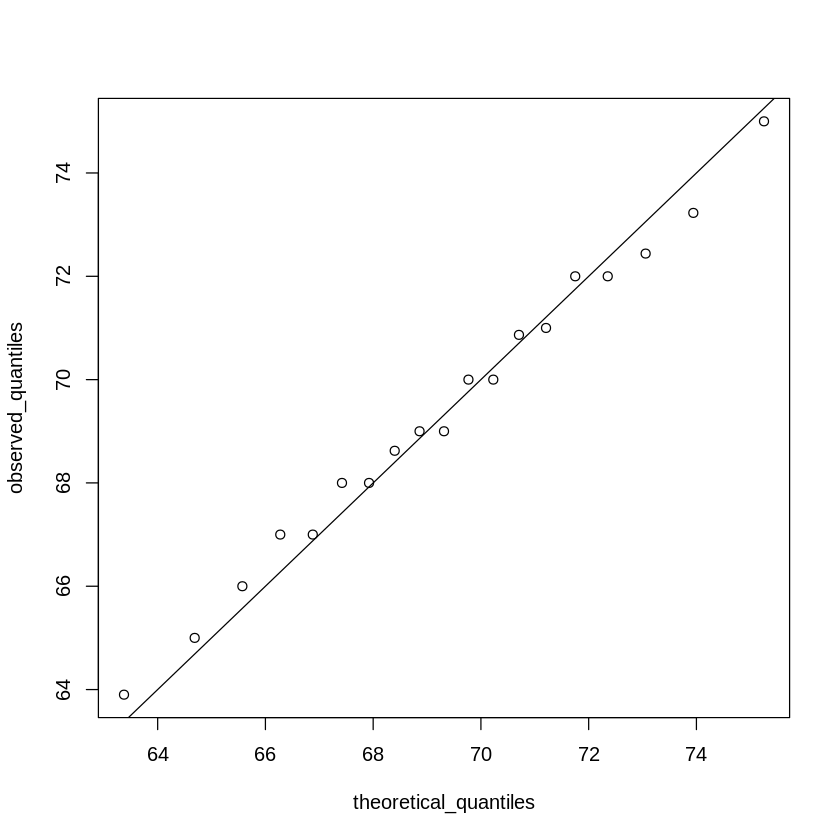

In [29]:
# make QQ-plot
plot(theoretical_quantiles, observed_quantiles)
abline(0,1)


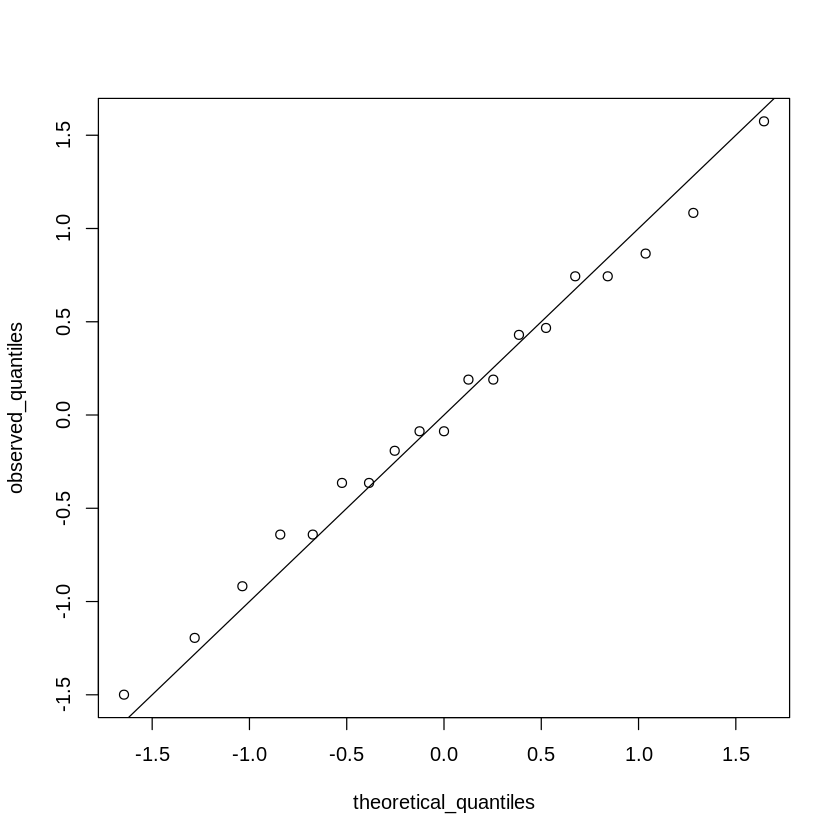

In [30]:
# make QQ-plot with scaled values
observed_quantiles <- quantile(z, p)
theoretical_quantiles <- qnorm(p)
plot(theoretical_quantiles, observed_quantiles)
abline(0,1)

##Percentiles
- Percentiles are the quantiles obtained when defining  p  as  0.01,0.02,...,0.99 . They summarize the values at which a certain percent of the observations are equal to or less than that value.
- The 50th percentile is also known as the median.
- The quartiles are the 25th, 50th and 75th percentiles.

##Boxplots
- When data do not follow a normal distribution and cannot be succinctly summarized by only the mean and standard deviation, an alternative is to report a five-number summary: range (ignoring outliers) and the quartiles (25th, 50th, 75th percentile).
- In a boxplot, the box is defined by the 25th and 75th percentiles and the median is a horizontal line through the box. The whiskers show the range excluding outliers, and outliers are plotted separately as individual points.
- The interquartile range is the distance between the 25th and 75th percentiles.
- Boxplots are particularly useful when comparing multiple distributions.

#Exercise


##Exercise 1. Vector lengths

In [31]:
library(dslabs)
data(heights)
male <- heights$height[heights$sex=="Male"]
female <- heights$height[heights$sex=="Female"]
length(male)
length(female)

[1] 812

[1] 238

##Exercise 2. Percentiles

In [32]:
library(dslabs)
data(heights)
male <- heights$height[heights$sex=="Male"]
female <- heights$height[heights$sex=="Female"]
female_percentiles <- quantile(female,seq(0.1,0.9,0.2))
male_percentiles <- quantile(male,seq(0.1,0.9,0.2))
df <- data.frame(female = female_percentiles, male = male_percentiles)
df

,female,male
,<dbl>,<dbl>
10%,61.00000,65.00000
30%,63.00000,68.00000
50%,64.98031,69.00000
70%,66.46417,71.00000
90%,69.00000,73.22751


##Exercise 3,4,5. Interpreting Boxplots 
##Exercise 6. Low quantiles
##Exercise 7. Interquantile Range (IQR)

In [ ]:
#